In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

## Added the unemployment insurance claims CSV below

In [2]:
# Read in Affinity, COVID-19, and GeoID Data
affinity_df = pd.read_csv('Data/Affinity-State-Daily.csv')
covid_df = pd.read_csv('Data/COVID_Cases-State-Daily.csv')
geoids_df = pd.read_csv('Data/GeoIDs-State.csv')
uic_df = pd.read_csv('Data/UI_Claims-State-Weekly.csv')

In [3]:
affinity_date = pd.to_datetime(affinity_df[['year', 'month', 'day']])
affinity_date

0      2020-01-24
1      2020-01-24
2      2020-01-24
3      2020-01-24
4      2020-01-24
          ...    
7441   2020-06-17
7442   2020-06-17
7443   2020-06-17
7444   2020-06-17
7445   2020-06-17
Length: 7446, dtype: datetime64[ns]

In [4]:
affinity_df["date"] = affinity_date
affinity_df = affinity_df[ ['date'] + [ col for col in affinity_df.columns if col != 'date' ] ]
affinity_df

,date,year,month,day,statefips,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-24,2020,1,24,1,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760
1,2020-01-24,2020,1,24,2,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230
2,2020-01-24,2020,1,24,4,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610
3,2020-01-24,2020,1,24,5,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444
4,2020-01-24,2020,1,24,6,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700
7442,2020-06-17,2020,6,17,53,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600
7443,2020-06-17,2020,6,17,54,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200
7444,2020-06-17,2020,6,17,55,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700


In [5]:
covid_date = pd.to_datetime(covid_df[['year', 'month', 'day']])
covid_date

0      2020-01-21
1      2020-01-21
2      2020-01-21
3      2020-01-21
4      2020-01-21
          ...    
8920   2020-07-13
8921   2020-07-13
8922   2020-07-13
8923   2020-07-13
8924   2020-07-13
Length: 8925, dtype: datetime64[ns]

In [6]:
# add created date column to covid_df
covid_df["date"] = covid_date
covid_df = covid_df[ ['date'] + [ col for col in covid_df.columns if col != 'date' ] ]
covid_df

,date,year,month,day,statefips,case_rate,new_case_rate
0,2020-01-21,2020,1,21,1,0.0,.
1,2020-01-21,2020,1,21,2,0.0,.
2,2020-01-21,2020,1,21,4,0.0,.
3,2020-01-21,2020,1,21,5,0.0,.
4,2020-01-21,2020,1,21,6,0.0,.
...,...,...,...,...,...,...,...
8920,2020-07-13,2020,7,13,51,839.0,9.27
8921,2020-07-13,2020,7,13,53,572.0,9.42
8922,2020-07-13,2020,7,13,54,241.0,6.94
8923,2020-07-13,2020,7,13,55,697.0,13


In [7]:
# Merge covid and affinity dataframes
merge1_df = pd.merge(covid_df, affinity_df, on=["date", "statefips"], how="left")
merge1_df

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,year_y,month_y,day_y,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-21,2020,1,21,1,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-21,2020,1,21,2,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-21,2020,1,21,4,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-21,2020,1,21,5,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-21,2020,1,21,6,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,2020-07-13,2020,7,13,51,839.0,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8921,2020-07-13,2020,7,13,53,572.0,9.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8922,2020-07-13,2020,7,13,54,241.0,6.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8923,2020-07-13,2020,7,13,55,697.0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merge1_df = merge1_df.dropna(how='any')
merge1_df

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,year_y,month_y,day_y,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
153,2020-01-24,2020,1,24,1,0.0,.,2020.0,1.0,24.0,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760
154,2020-01-24,2020,1,24,2,0.0,.,2020.0,1.0,24.0,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230
155,2020-01-24,2020,1,24,4,0.0,.,2020.0,1.0,24.0,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610
156,2020-01-24,2020,1,24,5,0.0,.,2020.0,1.0,24.0,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444
157,2020-01-24,2020,1,24,6,0.0,.,2020.0,1.0,24.0,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7594,2020-06-17,2020,6,17,51,653.0,6.02,2020.0,6.0,17.0,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700
7595,2020-06-17,2020,6,17,53,371.0,4.37,2020.0,6.0,17.0,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600
7596,2020-06-17,2020,6,17,54,133.0,1.46,2020.0,6.0,17.0,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200
7597,2020-06-17,2020,6,17,55,449.0,5.09,2020.0,6.0,17.0,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700


In [9]:
merge2_df = pd.merge(merge1_df, geoids_df, on="statefips", how="left")
del merge2_df['year_y']
del merge2_df['month_y']
del merge2_df['day_y']
merge2_df

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,1,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760,Alabama,AL,4903185
1,2020-01-24,2020,1,24,2,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230,Alaska,AK,731545
2,2020-01-24,2020,1,24,4,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610,Arizona,AZ,7278717
3,2020-01-24,2020,1,24,5,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444,Arkansas,AR,3017804
4,2020-01-24,2020,1,24,6,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473,California,CA,39512223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,653.0,6.02,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700,Virginia,VA,8535519
7442,2020-06-17,2020,6,17,53,371.0,4.37,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600,Washington,WA,7614893
7443,2020-06-17,2020,6,17,54,133.0,1.46,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200,West Virginia,WV,1792147
7444,2020-06-17,2020,6,17,55,449.0,5.09,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700,Wisconsin,WI,5822434


In [10]:
merge2_df = merge2_df.rename(columns={"year_x": "year", "month_x": "month", "day_x": "day"})
merge2_df

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,1,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760,Alabama,AL,4903185
1,2020-01-24,2020,1,24,2,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230,Alaska,AK,731545
2,2020-01-24,2020,1,24,4,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610,Arizona,AZ,7278717
3,2020-01-24,2020,1,24,5,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444,Arkansas,AR,3017804
4,2020-01-24,2020,1,24,6,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473,California,CA,39512223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,653.0,6.02,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700,Virginia,VA,8535519
7442,2020-06-17,2020,6,17,53,371.0,4.37,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600,Washington,WA,7614893
7443,2020-06-17,2020,6,17,54,133.0,1.46,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200,West Virginia,WV,1792147
7444,2020-06-17,2020,6,17,55,449.0,5.09,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700,Wisconsin,WI,5822434


## Q2: What is the relationship between unemployment insurance claims and consumer spending trends since the onset of COVID-19 in the United States?

### Data Cleaning

In [11]:
# Part 1: Consumer spending (cs) data
# Check the day of week and select data from Saturday only, the end date for each week used in the unemployment insurance data set

q2_cs_df = merge2_df.copy()
q2_cs_df['day_of_week'] = merge2_df['date'].dt.day_name()
q2_cs_df = q2_cs_df.loc[q2_cs_df['day_of_week'] == 'Saturday']
q2_cs_df

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,...,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019,day_of_week
51,2020-01-25,2020,1,25,1,0.00000,.,0.000291,0.0135,0.00580,...,0.00199,0.00612,-0.021100,0.03850,0.0455,-0.02470,Alabama,AL,4903185,Saturday
52,2020-01-25,2020,1,25,2,0.00000,.,-0.064800,0.0268,-0.04460,...,.,-0.05860,0.150000,-0.03790,-0.0852,-0.17400,Alaska,AK,731545,Saturday
53,2020-01-25,2020,1,25,4,0.00000,.,-0.006380,0.0495,-0.01040,...,-0.0101,-0.01140,-0.000813,0.00105,0.0139,-0.02580,Arizona,AZ,7278717,Saturday
54,2020-01-25,2020,1,25,5,0.00000,.,0.030300,-0.0178,0.00584,...,0.0104,0.00174,0.023500,-0.00520,0.0115,0.02110,Arkansas,AR,3017804,Saturday
55,2020-01-25,2020,1,25,6,0.00253,.,-0.003080,-0.0127,0.00565,...,0.00762,0.00773,-0.004620,0.01360,0.0165,-0.00769,California,CA,39512223,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7237,2020-06-13,2020,6,13,51,631.00000,7.48,-0.362000,-0.4060,-0.07740,...,0.0605,-0.05410,-0.062100,0.08880,-0.1660,-0.53600,Virginia,VA,8535519,Saturday
7238,2020-06-13,2020,6,13,53,354.00000,4.04,-0.460000,-0.6000,-0.15900,...,-0.205,-0.11300,-0.305000,0.05920,-0.1670,-0.52200,Washington,WA,7614893,Saturday
7239,2020-06-13,2020,6,13,54,127.00000,1.1,-0.207000,-0.5580,0.02870,...,0.032,0.03750,0.234000,0.07790,-0.1140,-0.35800,West Virginia,WV,1792147,Saturday
7240,2020-06-13,2020,6,13,55,430.00000,10.6,-0.370000,-0.4020,-0.09360,...,-0.105,-0.08520,-0.045500,0.06290,-0.2080,-0.50100,Wisconsin,WI,5822434,Saturday


In [12]:
# Reduce dataframe to Covid case rate and relevant consumer spending data
reduced_q2_cs_df = q2_cs_df.loc[:,['date', 'statename', 'case_rate',
                                  'spend_all', 'spend_acf', 'spend_aer',
                                  'spend_apg', 'spend_grf', 'spend_hcs',
                                  'spend_tws']]
reduced_q2_cs_df

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
51,2020-01-25,Alabama,0.00000,0.00580,0.000291,0.0135,-0.021100,0.03850,0.0455,-0.02470
52,2020-01-25,Alaska,0.00000,-0.04460,-0.064800,0.0268,0.150000,-0.03790,-0.0852,-0.17400
53,2020-01-25,Arizona,0.00000,-0.01040,-0.006380,0.0495,-0.000813,0.00105,0.0139,-0.02580
54,2020-01-25,Arkansas,0.00000,0.00584,0.030300,-0.0178,0.023500,-0.00520,0.0115,0.02110
55,2020-01-25,California,0.00253,0.00565,-0.003080,-0.0127,-0.004620,0.01360,0.0165,-0.00769
...,...,...,...,...,...,...,...,...,...,...
7237,2020-06-13,Virginia,631.00000,-0.07740,-0.362000,-0.4060,-0.062100,0.08880,-0.1660,-0.53600
7238,2020-06-13,Washington,354.00000,-0.15900,-0.460000,-0.6000,-0.305000,0.05920,-0.1670,-0.52200
7239,2020-06-13,West Virginia,127.00000,0.02870,-0.207000,-0.5580,0.234000,0.07790,-0.1140,-0.35800
7240,2020-06-13,Wisconsin,430.00000,-0.09360,-0.370000,-0.4020,-0.045500,0.06290,-0.2080,-0.50100


In [13]:
# Part 2: Unemployment insurance (ui) claims data

#View unemployment insurance dataframe
uic_df

,year,month,day_endofweek,statefips,initial_claims,initial_claims_rate,total_claims,total_claims_rate
0,2020,3,14,1,1819,0.0811,14889,0.664
1,2020,3,7,1,1663,0.0742,15320,0.683
2,2020,1,11,1,3629,0.1620,24772,1.110
3,2020,1,4,1,4578,0.2040,23101,1.030
4,2020,4,25,1,74966,3.3400,248821,11.100
...,...,...,...,...,...,...,...,...
1219,2020,2,29,56,471,0.1610,4014,1.370
1220,2020,4,18,56,4381,1.5000,18683,6.390
1221,2020,2,8,56,589,0.2020,4096,1.400
1222,2020,5,16,56,2303,0.7880,19638,6.720


In [14]:
# View UI data types
uic_df.dtypes

year                     int64
month                    int64
day_endofweek            int64
statefips                int64
initial_claims           int64
initial_claims_rate    float64
total_claims             int64
total_claims_rate      float64
dtype: object

In [15]:
# Rename column from day_endofweek (Saturdays) to day
rename_uic_df = uic_df.rename(columns={"day_endofweek": "day"})
rename_uic_df

,year,month,day,statefips,initial_claims,initial_claims_rate,total_claims,total_claims_rate
0,2020,3,14,1,1819,0.0811,14889,0.664
1,2020,3,7,1,1663,0.0742,15320,0.683
2,2020,1,11,1,3629,0.1620,24772,1.110
3,2020,1,4,1,4578,0.2040,23101,1.030
4,2020,4,25,1,74966,3.3400,248821,11.100
...,...,...,...,...,...,...,...,...
1219,2020,2,29,56,471,0.1610,4014,1.370
1220,2020,4,18,56,4381,1.5000,18683,6.390
1221,2020,2,8,56,589,0.2020,4096,1.400
1222,2020,5,16,56,2303,0.7880,19638,6.720


In [16]:
# Add date column to ui_df in YYYY-MM-DD format
uic_date = pd.to_datetime(rename_uic_df[['year', 'month', 'day']])
rename_uic_df['date'] = uic_date
rename_uic_df

,year,month,day,statefips,initial_claims,initial_claims_rate,total_claims,total_claims_rate,date
0,2020,3,14,1,1819,0.0811,14889,0.664,2020-03-14
1,2020,3,7,1,1663,0.0742,15320,0.683,2020-03-07
2,2020,1,11,1,3629,0.1620,24772,1.110,2020-01-11
3,2020,1,4,1,4578,0.2040,23101,1.030,2020-01-04
4,2020,4,25,1,74966,3.3400,248821,11.100,2020-04-25
...,...,...,...,...,...,...,...,...,...
1219,2020,2,29,56,471,0.1610,4014,1.370,2020-02-29
1220,2020,4,18,56,4381,1.5000,18683,6.390,2020-04-18
1221,2020,2,8,56,589,0.2020,4096,1.400,2020-02-08
1222,2020,5,16,56,2303,0.7880,19638,6.720,2020-05-16


In [17]:
# Merge state names to ui_df
uic_state_df = pd.merge(rename_uic_df, geoids_df, on='statefips', how='left')

# Drop unneeded columns
uic_state_df = uic_state_df.drop(['statefips','year', 'month', 'day', 'stateabbrev'], axis=1)
uic_state_df

,initial_claims,initial_claims_rate,total_claims,total_claims_rate,date,statename,state_pop2019
0,1819,0.0811,14889,0.664,2020-03-14,Alabama,4903185
1,1663,0.0742,15320,0.683,2020-03-07,Alabama,4903185
2,3629,0.1620,24772,1.110,2020-01-11,Alabama,4903185
3,4578,0.2040,23101,1.030,2020-01-04,Alabama,4903185
4,74966,3.3400,248821,11.100,2020-04-25,Alabama,4903185
...,...,...,...,...,...,...,...
1219,471,0.1610,4014,1.370,2020-02-29,Wyoming,578759
1220,4381,1.5000,18683,6.390,2020-04-18,Wyoming,578759
1221,589,0.2020,4096,1.400,2020-02-08,Wyoming,578759
1222,2303,0.7880,19638,6.720,2020-05-16,Wyoming,578759


In [18]:
# Part 3: Merge consumer spending data with unemployment insurance claims data
cs_uic_df = pd.merge(reduced_q2_cs_df, uic_state_df, how='left', on=['date', 'statename'])
cs_uic_df

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws,initial_claims,initial_claims_rate,total_claims,total_claims_rate,state_pop2019
0,2020-01-25,Alabama,0.00000,0.00580,0.000291,0.0135,-0.021100,0.03850,0.0455,-0.02470,2129,0.0950,20519,0.915,4903185
1,2020-01-25,Alaska,0.00000,-0.04460,-0.064800,0.0268,0.150000,-0.03790,-0.0852,-0.17400,1003,0.2880,10499,3.020,731545
2,2020-01-25,Arizona,0.00000,-0.01040,-0.006380,0.0495,-0.000813,0.00105,0.0139,-0.02580,3475,0.0979,21876,0.616,7278717
3,2020-01-25,Arkansas,0.00000,0.00584,0.030300,-0.0178,0.023500,-0.00520,0.0115,0.02110,1683,0.1240,14014,1.030,3017804
4,2020-01-25,California,0.00253,0.00565,-0.003080,-0.0127,-0.004620,0.01360,0.0165,-0.00769,45596,0.2350,381865,1.970,39512223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2020-06-13,Virginia,631.00000,-0.07740,-0.362000,-0.4060,-0.062100,0.08880,-0.1660,-0.53600,27186,0.6160,414079,9.380,8535519
1067,2020-06-13,Washington,354.00000,-0.15900,-0.460000,-0.6000,-0.305000,0.05920,-0.1670,-0.52200,30217,0.7720,440421,11.300,7614893
1068,2020-06-13,West Virginia,127.00000,0.02870,-0.207000,-0.5580,0.234000,0.07790,-0.1140,-0.35800,4327,0.5430,79563,9.980,1792147
1069,2020-06-13,Wisconsin,430.00000,-0.09360,-0.370000,-0.4020,-0.045500,0.06290,-0.2080,-0.50100,25543,0.8230,264071,8.500,5822434


In [19]:
# Get the approximate number of total confirmed COVID cases
cs_uic_df['total_cases'] = (cs_uic_df['case_rate']*100000).round().astype(int)
cs_uic_df

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws,initial_claims,initial_claims_rate,total_claims,total_claims_rate,state_pop2019,total_cases
0,2020-01-25,Alabama,0.00000,0.00580,0.000291,0.0135,-0.021100,0.03850,0.0455,-0.02470,2129,0.0950,20519,0.915,4903185,0
1,2020-01-25,Alaska,0.00000,-0.04460,-0.064800,0.0268,0.150000,-0.03790,-0.0852,-0.17400,1003,0.2880,10499,3.020,731545,0
2,2020-01-25,Arizona,0.00000,-0.01040,-0.006380,0.0495,-0.000813,0.00105,0.0139,-0.02580,3475,0.0979,21876,0.616,7278717,0
3,2020-01-25,Arkansas,0.00000,0.00584,0.030300,-0.0178,0.023500,-0.00520,0.0115,0.02110,1683,0.1240,14014,1.030,3017804,0
4,2020-01-25,California,0.00253,0.00565,-0.003080,-0.0127,-0.004620,0.01360,0.0165,-0.00769,45596,0.2350,381865,1.970,39512223,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2020-06-13,Virginia,631.00000,-0.07740,-0.362000,-0.4060,-0.062100,0.08880,-0.1660,-0.53600,27186,0.6160,414079,9.380,8535519,63100000
1067,2020-06-13,Washington,354.00000,-0.15900,-0.460000,-0.6000,-0.305000,0.05920,-0.1670,-0.52200,30217,0.7720,440421,11.300,7614893,35400000
1068,2020-06-13,West Virginia,127.00000,0.02870,-0.207000,-0.5580,0.234000,0.07790,-0.1140,-0.35800,4327,0.5430,79563,9.980,1792147,12700000
1069,2020-06-13,Wisconsin,430.00000,-0.09360,-0.370000,-0.4020,-0.045500,0.06290,-0.2080,-0.50100,25543,0.8230,264071,8.500,5822434,43000000


In [20]:
# Part 4: Retrieve data for the top 5 states with most COVID case rates and such data for Florida

# Get data for June 13, the last date with available data
jun13_df = cs_uic_df[cs_uic_df['date'] == '2020-06-13']
jun13_df.head()

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws,initial_claims,initial_claims_rate,total_claims,total_claims_rate,state_pop2019,total_cases
1020,2020-06-13,Alabama,502.0,-0.0111,-0.205,-0.380,0.0987,0.0905,-0.1000,-0.470,18367,0.819,182349,8.13,4903185,50200000
1021,2020-06-13,Alaska,98.7,-0.1180,-0.306,-0.347,-0.0462,0.0102,-0.3850,-0.522,6797,1.950,52589,15.10,731545,9870000
1022,2020-06-13,Arizona,478.0,-0.1220,-0.401,-0.496,-0.1700,0.0656,-0.1460,-0.493,22419,0.631,231948,6.53,7278717,47800000
1023,2020-06-13,Arkansas,401.0,0.0105,-0.226,-0.533,0.0534,0.0690,-0.0181,-0.572,9381,0.688,123004,9.03,3017804,40100000
1024,2020-06-13,California,381.0,-0.1900,-0.478,-0.646,-0.2710,0.0953,-0.1890,-0.588,241424,1.240,3242837,16.70,39512223,38100000


In [21]:
# Sort the dataframe to see which 5 states had the highest COVID case rates
jun13_sorted = jun13_df.sort_values('case_rate', ascending=False)

# Store the names of top 5 states to list
state_list = jun13_sorted.iloc[0:5]['statename'].values.tolist()

# Add Florida to list
state_list.append('Florida')
state_list

['New York',
 'New Jersey',
 'Massachusetts',
 'Rhode Island',
 'District Of Columbia',
 'Florida']

In [22]:
# Slice out rows that match with the six selected states
clean_cs_uic_df = cs_uic_df[cs_uic_df['statename'].isin (state_list)]
clean_cs_uic_df.reset_index(drop=True)

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws,initial_claims,initial_claims_rate,total_claims,total_claims_rate,state_pop2019,total_cases
0,2020-01-25,District Of Columbia,0.0,0.010100,0.0161,-0.03950,-0.05280,-0.00207,0.1430,-0.00294,534,0.1300,7683,1.870,705749,0
1,2020-01-25,Florida,0.0,-0.012500,-0.0165,-0.02470,-0.00702,-0.00939,-0.0184,-0.00413,5206,0.0504,38553,0.373,21477737,0
2,2020-01-25,Massachusetts,0.0,0.013100,0.0365,-0.06670,0.04110,0.02130,0.0584,-0.01100,6022,0.1580,81551,2.140,6892503,0
3,2020-01-25,New Jersey,0.0,0.000211,0.0101,0.03110,-0.00344,-0.01180,-0.0286,0.00314,9325,0.2080,116407,2.590,8882190,0
4,2020-01-25,New York,0.0,0.011800,0.0320,0.00458,0.01920,0.02380,-0.0194,0.07810,15022,0.1580,179066,1.880,19453561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2020-06-13,Florida,342.0,-0.054800,-0.2420,-0.47300,-0.02360,0.06540,-0.0465,-0.47900,88148,0.8530,1008350,9.750,21477737,34200000
122,2020-06-13,Massachusetts,1529.0,-0.085400,-0.4280,-0.52100,-0.04300,0.13600,-0.2580,-0.56500,30411,0.7970,608402,15.900,6892503,152900000
123,2020-06-13,New Jersey,1876.0,-0.083100,-0.4320,-0.36900,-0.23800,0.22100,-0.1380,-0.55600,26438,0.5880,564707,12.600,8882190,187600000
124,2020-06-13,New York,1991.0,-0.097000,-0.4390,-0.60400,-0.19500,0.13300,-0.2310,-0.51500,95150,1.0000,1772187,18.600,19453561,199100000


### Data Analysis & Visualization

In [23]:
# Weekly statitics of all six states
weekly_stats = clean_cs_uic_df.groupby('date').agg(
    case_rate_mean=('case_rate', np.mean),
    total_cases_mean=('total_cases', np.mean),
    spend_all_mean=('spend_all', np.mean),
    total_claims_mean=('total_claims', np.mean),
    total_claims_rate_mean=('total_claims_rate', np.mean)
).round(3)

weekly_stats.reset_index().head()

,date,case_rate_mean,total_cases_mean,spend_all_mean,total_claims_mean,total_claims_rate_mean
0,2020-01-25,0.000,0.000,0.005,72509.667,1.829
1,2020-02-01,0.002,241.667,-0.018,74009.167,1.857
2,2020-02-08,0.002,241.667,-0.018,73074.500,1.849
3,2020-02-15,0.002,241.667,-0.014,73117.500,1.849
4,2020-02-22,0.002,241.667,-0.032,73392.667,1.880


In [24]:
# Set x-axis of plots to the dates in date set
x_axis = clean_cs_uic_df['date'].unique()
x_axis

array(['2020-01-25T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2020-02-08T00:00:00.000000000', '2020-02-15T00:00:00.000000000',
       '2020-02-22T00:00:00.000000000', '2020-02-29T00:00:00.000000000',
       '2020-03-07T00:00:00.000000000', '2020-03-14T00:00:00.000000000',
       '2020-03-21T00:00:00.000000000', '2020-03-28T00:00:00.000000000',
       '2020-04-04T00:00:00.000000000', '2020-04-11T00:00:00.000000000',
       '2020-04-18T00:00:00.000000000', '2020-04-25T00:00:00.000000000',
       '2020-05-02T00:00:00.000000000', '2020-05-09T00:00:00.000000000',
       '2020-05-16T00:00:00.000000000', '2020-05-23T00:00:00.000000000',
       '2020-05-30T00:00:00.000000000', '2020-06-06T00:00:00.000000000',
       '2020-06-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [25]:
# Get values for plotting
COVID_case_rate = weekly_stats['case_rate_mean']
total_COVID = weekly_stats['total_cases_mean']
total_spending = weekly_stats['spend_all_mean']
total_claims = weekly_stats['total_claims_mean']
total_claims_rate = weekly_stats['total_claims_rate_mean']

Note: Data is not normally distributed


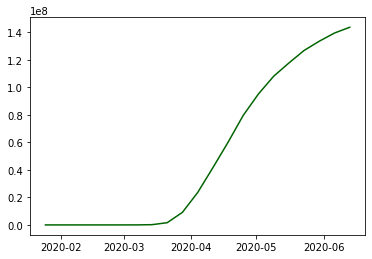

In [26]:
# Plot approximate number of total COVID cases between Jan and Jun
plt.plot(x_axis, total_COVID, color='darkgreen')
print('Note: Data is not normally distributed')

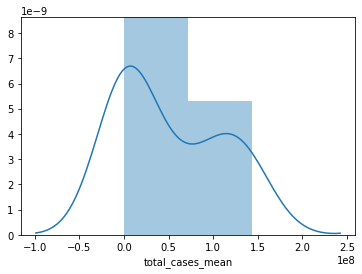

In [27]:
# Plot the distribution of total COVID cases between Jan and Jun
sns.distplot(total_COVID)

Note: Data is not normally distributed


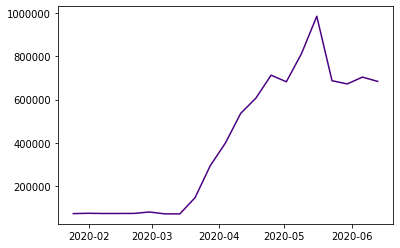

In [28]:
# Plot total number of unemployment insurance claims between Jan and Jun
plt.plot(x_axis, total_claims, color='indigo')
print('Note: Data is not normally distributed')

# plt.plot(x_axis, COVID_case_rate, color='dodgerblue')
# plt.plot(x_axis, total_spending, color='goldenrod')
# plt.plot(x_axis, total_claims_rate, color='dodgerblue')

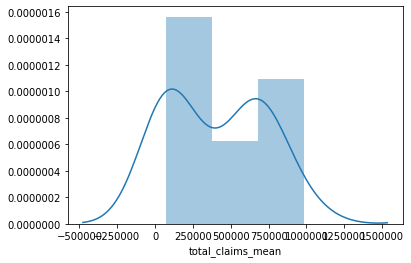

In [29]:
# Plot the distribution of total number of unemployment insurance claims between Jan and Jun
sns.distplot(total_claims)

Note: Data is not normally distributed


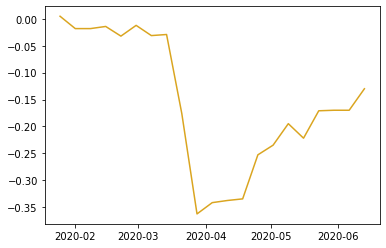

In [30]:
# Plot of consumer spending change between Jan and Jun
plt.plot(x_axis, total_spending, color='goldenrod')
print('Note: Data is not normally distributed')


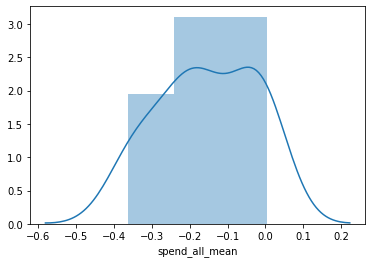

In [31]:
# Plot the distribution of consumer spending change between Jan and Jun
sns.distplot(total_spending)

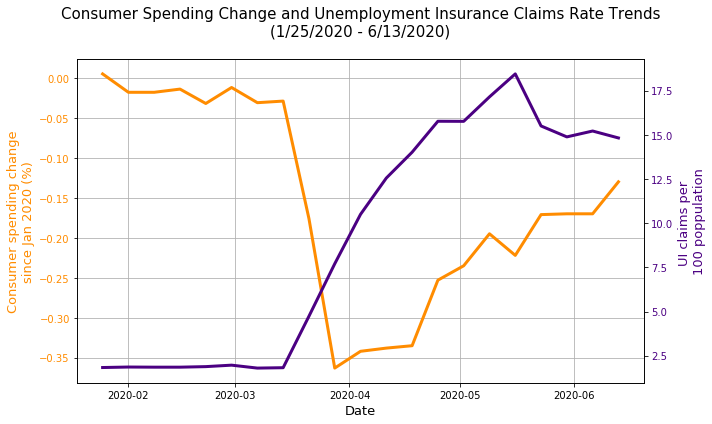

In [79]:
# Plot multiple line chart with different scale to show the trends of consumer spending and unemployment insurance claims over time

# # Create some mock data
# t = np.arange(0.01, 10.0, 0.01)
# data1 = np.exp(t)
# data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('Date', fontsize=13)
ax1.set_ylabel('Consumer spending change\nsince Jan 2020 (%)', color='darkorange', fontsize=13)
ax1.plot(x_axis, total_spending, color='darkorange', linewidth=3)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='darkorange')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('UI claims per \n100 poppulation', color='indigo', fontsize=13)  # we already handled the x-label with ax1
ax2.plot(x_axis, total_claims_rate, color='indigo', linewidth=3)
ax2.tick_params(axis='y', labelcolor='indigo')

plt.title('Consumer Spending Change and Unemployment Insurance Claims Rate Trends\n(1/25/2020 - 6/13/2020)\n', fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Q2_cs_ui_line.png')
plt.show()

### Observations
* As consumer spending started to decrease in March, unemployment insurance claims rates started to climb
* Consumer spending then began to pick up again around mid-April
* It seems both factors are somewhat negatively correlated but the significance of correlation needs to further examined

In [33]:
# # Set dataframe index to 'statename'
# states_df = clean_cs_uic_df.set_index('statename')

In [80]:
# # Plot multi-line chart showing trends of unemployment insurance claims rates by the 6 selected states

# plt.figure(figsize=(10,6)).tight_layout()

# # Plot the unemployment insurance claims rates in the top 5, and Florida

# ny, = plt.plot(x_axis, states_df.loc['New York',["total_claims_rate"]], 
#                color="indigo",label='New York', linewidth=3)

# nj, = plt.plot(x_axis, states_df.loc['New Jersey',["total_claims_rate"]], 
#                color="darkorchid",label='New Jersey', linewidth=3)

# mass, = plt.plot(x_axis, states_df.loc['Massachusetts',["total_claims_rate"]], 
#                  color="violet",label='Massachusetts', linewidth=3)

# ri, = plt.plot(x_axis, states_df.loc['Rhode Island',["total_claims_rate"]], 
#                color="deeppink",label='Rhode Island', linewidth=3)

# doc, = plt.plot(x_axis, states_df.loc['District Of Columbia',["total_claims_rate"]], 
#                 color="gold",label='District Of Columbia', linewidth=3)

# fla, = plt.plot(x_axis, states_df.loc['Florida',["total_claims_rate"]], 
#                 color="cornflowerblue",label='Florida', linewidth=3)

# # Label the chart
# plt.title("Unemployment Insurance Claims Rate by States\n(1/25/2020 - 6/13/2020)\n")    
# plt.xlabel('Date')
# plt.ylabel('UI claims per 100 poppulation')
# plt.legend(handles=[ny, nj, mass, ri, doc, fla], loc="best")
# plt.grid(True)

# # Show the chart
# plt.show()

### Observations
* The breakdown of unemployment insurance claims rates by states show a similar increasing trend as in the previous chart 

In [35]:
# # Scatter plot 1: Total claims vs. total covid cases

# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(total_COVID, total_claims)
# regress_values = total_COVID * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.figure(figsize=(10,6))
# plt.scatter(
#     total_COVID, total_claims, 
#     marker='o', 
#     facecolors='teal', 
#     edgecolors='teal')
# plt.plot(total_COVID,regress_values,"r-")
# plt.annotate(line_eq,(0.41e8,300000),fontsize=15,color="red")

# plt.title('Unemployment Insurance Claims vs. Covid Cases\n(1/25/2020 - 6/13/2020)\n')
# plt.xlabel('Number of Confirmed COVID cases')
# plt.ylabel('Number of Claims')

In [36]:
# # Independent t-test <-- Not suitable here...? 
# # https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php#:~:text=for%20two%20samples-,Introduction,means%20in%20two%20unrelated%20groups.
# stats.ttest_ind(total_COVID, total_claims, equal_var=False)

In [37]:
# # Pearson correlation coefficient; assumes normal distributions of 2 indp. data sets
# # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr
# stats.pearsonr(total_COVID, total_claims)

In [38]:
# Spearman correlation coefficient; assumes 2 data sets are not normally distributed
# # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr
# stats.spearmanr(total_COVID, total_claims)

In [39]:
# print(f'R-squared is:') 
# rvalue**2

In [40]:
# ### Observations
# * Spearman R is chosen for analysis here as data sets are not normally distributed
# * Correlation (0.8562) is close to 1 and is much greater than p-value (0.000000734)
# * Correlation is considered significant
# * The increase in confirmed COVID cases imply an increase in unemployment insurance claims
# * Based on the R-squared, approximately 50% of variance in the unemployment claims rate can be explained in the COVID case rate. -->

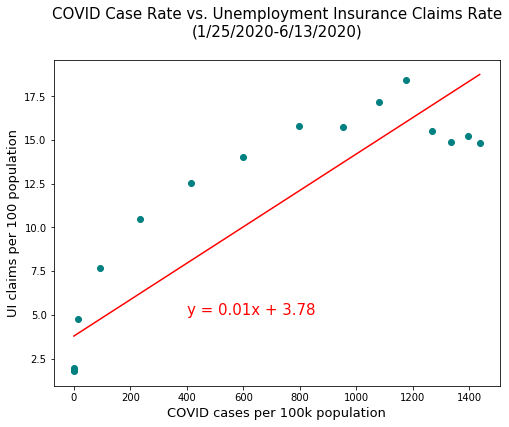

In [82]:
# Scatter plot 1: COVID case rate vs. unemployment insurance claims rate between Jan and Jun

(slope1, intercept1, rvalue1, pvalue1, stderr1) = stats.linregress(COVID_case_rate, total_claims_rate)
regress_values1 = COVID_case_rate * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

plt.figure(figsize=(8,6)).tight_layout()
plt.scatter(
    COVID_case_rate, total_claims_rate,
    marker='o', 
    facecolors='teal', 
    edgecolors='teal')
plt.plot(COVID_case_rate,regress_values1,"r-")
plt.annotate(line_eq1,(400, 5),fontsize=15,color="red")

plt.title('COVID Case Rate vs. Unemployment Insurance Claims Rate\n(1/25/2020-6/13/2020)\n', fontsize=15)
plt.xlabel('COVID cases per 100k population', fontsize=13)
plt.ylabel('UI claims per 100 population', fontsize=13)

fig.tight_layout()  
plt.savefig('Q2_covid_uir_scatter.png')
plt.show()

In [42]:
# Spearman correlation coefficient; assumes 2 data sets are not normally distributed
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr
stats.spearmanr(COVID_case_rate, total_claims_rate)

SpearmanrResult(correlation=0.8342756547630794, pvalue=2.5940716872147184e-06)

In [43]:
print(f'R-squared is: {rvalue1**1}') 

R-squared is: 0.9050972113096862


### Observations
* Spearman R is chosen for analysis here as data sets are not normally distributed
* Correlation (0.8343) is close to 1 and p-value (0.00000259) is much less than 0.05
* Correlation is considered significant
* The increase in confirmed COVID cases imply an increase in unemployment insurance claims
* Based on the R-squared, approximately 81% of variance in the unemployment claims rate can be explained in the COVID case rate

In [44]:
# # Scatter plot 3: Consumer spending vs. unemployment insurance claims between Jan and Jun

# (slope, intercept, rvalue3, pvalue, stderr) = stats.linregress(total_claims, total_spending)
# regress_values = total_claims * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.figure(figsize=(10,6)).tight_layout()
# plt.scatter(
#     total_claims, total_spending,
#     marker='o', 
#     facecolors='indigo', 
#     edgecolors='indigo')
# plt.plot(total_claims,regress_values,"r-")
# plt.annotate(line_eq,(200000, -0.05),fontsize=15,color="red")

# plt.title('Consumer spending vs. Unemployment Insurance Claims')
# plt.xlabel('Number of claims')
# plt.ylabel('Consumer spending change since Jan 2020 (%)')

In [45]:
# Spearman correlation coefficient; assumes 2 data sets are not normally distributed
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr
# stats.spearmanr(total_claims, total_spending)

In [46]:
# print(f'R-squared is:') 
# rvalue3**2

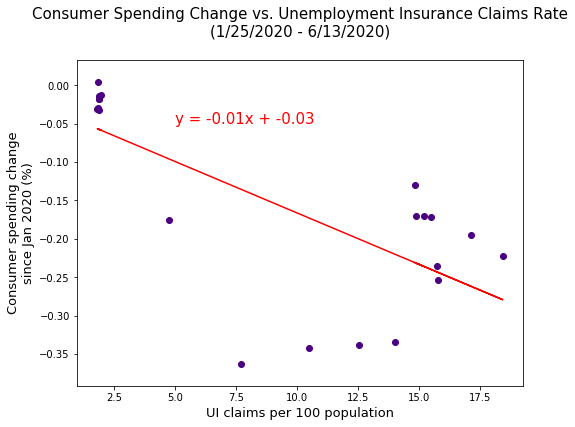

In [84]:
# Scatter plot 2: Consumer spending vs. unemployment insurance claims RATE between Jan and Jun

(slope2, intercept2, rvalue2, pvalue2, stderr2) = stats.linregress(total_claims_rate, total_spending)
regress_values2 = total_claims_rate * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

plt.figure(figsize=(8,6)).tight_layout()
plt.scatter(
    total_claims_rate, total_spending,
    marker='o', 
    facecolors='indigo', 
    edgecolors='indigo',
)
plt.plot(total_claims_rate,regress_values2,"r-")
plt.annotate(line_eq2,(5, -0.05),fontsize=15,color="red")

plt.title('Consumer Spending Change vs. Unemployment Insurance Claims Rate\n(1/25/2020 - 6/13/2020)\n', fontsize=15)
plt.xlabel('UI claims per 100 population', fontsize=13)
plt.ylabel('Consumer spending change\nsince Jan 2020 (%)', fontsize=13)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig('Q2_cs_uir_scatter.png')
plt.show()

In [48]:
stats.spearmanr(total_claims_rate, total_spending)

SpearmanrResult(correlation=-0.6295092955127416, pvalue=0.0022299142493963186)

In [49]:
print(f"R-squared is {rvalue2**2}")

R-squared is 0.4873117004576017


In [50]:
nat_mar_apr11 = cs_uic_df[cs_uic_df.date.between('2020-03-07', '2020-04-11')]
nat_mar_apr11

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws,initial_claims,initial_claims_rate,total_claims,total_claims_rate,state_pop2019,total_cases
306,2020-03-07,Alabama,0.0000,-0.03770,-0.0423,-0.1080,0.00643,0.078500,-0.004090,-0.2230,1663,0.0742,15320,0.683,4903185,0
307,2020-03-07,Alaska,0.0000,0.03130,-0.1620,-0.0669,0.21200,0.214000,-0.073500,0.0798,815,0.2340,9081,2.610,731545,0
308,2020-03-07,Arizona,0.0687,-0.01500,-0.0669,-0.1840,-0.01120,0.121000,0.023900,-0.1230,3357,0.0945,20950,0.590,7278717,6870
309,2020-03-07,Arkansas,0.0000,-0.03720,0.0327,-0.1650,-0.04500,0.000048,0.065600,-0.1810,1843,0.1350,13461,0.988,3017804,0
310,2020-03-07,California,0.2530,0.00291,-0.0620,-0.1010,-0.02550,0.213000,-0.000479,-0.1220,43385,0.2240,422249,2.180,39512223,25300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2020-04-11,Virginia,59.5000,-0.30200,-0.6550,-0.7390,-0.45200,0.133000,-0.554000,-0.7280,104619,2.3700,341410,7.740,8535519,5950000
608,2020-04-11,Washington,134.0000,-0.34000,-0.7170,-0.7480,-0.49600,0.139000,-0.527000,-0.7180,144455,3.6900,587391,15.000,7614893,13400000
609,2020-04-11,West Virginia,33.1000,-0.22900,-0.5890,-0.8390,-0.25300,0.160000,-0.517000,-0.6380,14944,1.8800,63541,7.970,1792147,3310000
610,2020-04-11,Wisconsin,55.2000,-0.29300,-0.6570,-0.7680,-0.34400,0.200000,-0.533000,-0.7500,70000,2.2500,332847,10.700,5822434,5520000


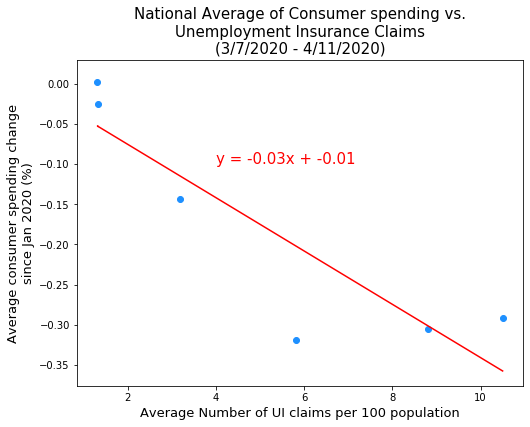

In [90]:
# Scatter plot 4: NATIONAL AVERAGE Consumer spending vs. unemployment insurance claims between March and April

nat_avg_cs1 = nat_mar_apr11.groupby('date')['spend_all'].mean()
nat_avg_ui1 = nat_mar_apr11.groupby('date')['total_claims_rate'].mean()

(slope3, intercept3, rvalue3, pvalue3, stderr3) = stats.linregress(nat_avg_ui1, nat_avg_cs1)
regress_values3 = nat_avg_ui1 * slope3 + intercept3
line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

plt.figure(figsize=(8,6))

plt.scatter(
    nat_avg_ui1, nat_avg_cs1,
    marker='o', 
    facecolors='dodgerblue', 
    edgecolors='dodgerblue')
plt.plot(nat_avg_ui1,regress_values3,"r-")
plt.annotate(line_eq3,(4, -0.1),fontsize=15,color="red")

plt.title('National Average of Consumer spending vs.\nUnemployment Insurance Claims\n(3/7/2020 - 4/11/2020)', fontsize=15)
plt.xlabel('Average Number of UI claims per 100 population', fontsize=13)
plt.ylabel('Average consumer spending change\nsince Jan 2020 (%)', fontsize=13)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Q2_nat_cs_uir_scatter_apr11.png')
plt.show()

In [52]:
# Spearman correlation coefficient; assumes 2 data sets are not normally distributed
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr
stats.spearmanr(nat_avg_ui1, nat_avg_cs1)

SpearmanrResult(correlation=-0.7714285714285715, pvalue=0.07239650145772594)

In [53]:
rvalue3**2

0.788777977600637

### Observations
* Still not a lot of correlation...
* R-sqaured is not particularly high

In [54]:
nat_apr18 = cs_uic_df[cs_uic_df.date.between('2020-04-18', '2020-06-13')]

nat_apr18

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws,initial_claims,initial_claims_rate,total_claims,total_claims_rate,state_pop2019,total_cases
612,2020-04-18,Alabama,96.3,-0.2230,-0.533,-0.692,-0.3960,0.0837,-0.5760,-0.669,66432,2.960,210759,9.40,4903185,9630000
613,2020-04-18,Alaska,42.6,-0.3440,-0.651,-0.653,-0.4130,-0.0658,-0.5120,-0.731,12201,3.510,60297,17.30,731545,4260000
614,2020-04-18,Arizona,64.8,-0.3110,-0.640,-0.682,-0.4710,-0.0187,-0.5140,-0.697,72457,2.040,242719,6.83,7278717,6480000
615,2020-04-18,Arkansas,58.9,-0.0404,-0.433,-0.726,-0.2110,0.2200,-0.4270,-0.691,25404,1.860,116682,8.56,3017804,5890000
616,2020-04-18,California,78.0,-0.3840,-0.702,-0.779,-0.5380,0.0423,-0.5770,-0.763,528360,2.720,2950818,15.20,39512223,7800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2020-06-13,Virginia,631.0,-0.0774,-0.362,-0.406,-0.0621,0.0888,-0.1660,-0.536,27186,0.616,414079,9.38,8535519,63100000
1067,2020-06-13,Washington,354.0,-0.1590,-0.460,-0.600,-0.3050,0.0592,-0.1670,-0.522,30217,0.772,440421,11.30,7614893,35400000
1068,2020-06-13,West Virginia,127.0,0.0287,-0.207,-0.558,0.2340,0.0779,-0.1140,-0.358,4327,0.543,79563,9.98,1792147,12700000
1069,2020-06-13,Wisconsin,430.0,-0.0936,-0.370,-0.402,-0.0455,0.0629,-0.2080,-0.501,25543,0.823,264071,8.50,5822434,43000000


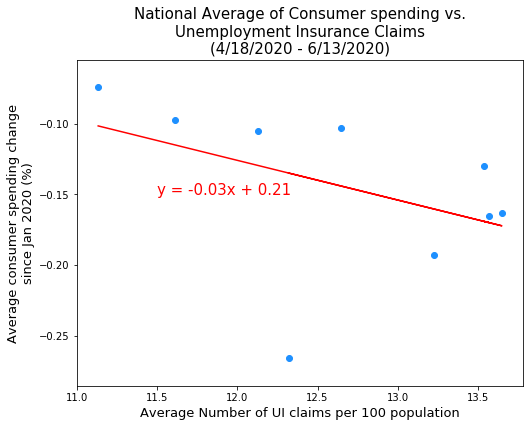

In [89]:
# Scatter plot 5: NATIONAL AVERAGE Consumer spending vs. unemployment insurance claims between APRIL 18 and JUNE 13

nat_avg_cs2 = nat_apr18.groupby('date')['spend_all'].mean()
nat_avg_ui2 = nat_apr18.groupby('date')['total_claims_rate'].mean()

(slope4, intercept4, rvalue4, pvalue4, stderr4) = stats.linregress(nat_avg_ui2, nat_avg_cs2)
regress_values4 = nat_avg_ui2 * slope4 + intercept4
line_eq4 = "y = " + str(round(slope4,2)) + "x + " + str(round(intercept4,2))

plt.figure(figsize=(8,6))

plt.scatter(
    nat_avg_ui2, nat_avg_cs2,
    marker='o', 
    facecolors='dodgerblue', 
    edgecolors='dodgerblue')
plt.plot(nat_avg_ui2,regress_values4,"r-")
plt.annotate(line_eq4,(11.5, -0.15),fontsize=15,color="red")

plt.title('National Average of Consumer spending vs.\nUnemployment Insurance Claims\n(4/18/2020 - 6/13/2020)', fontsize=15)
plt.xlabel('Average Number of UI claims per 100 population', fontsize=13)
plt.ylabel('Average consumer spending change\nsince Jan 2020 (%)', fontsize=13)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Q2_nat_cs_uir_scatter_jun13.png')
plt.show()

In [56]:
stats.spearmanr(nat_avg_ui2, nat_avg_cs2)

SpearmanrResult(correlation=-0.6, pvalue=0.0876228290414024)

In [57]:
rvalue4**2

0.18622477550093286